In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
covid_clean = pd.read_json('covid_no_nan.json', lines=True)

In [3]:
covid_feats = pd.read_json('covid_hosp_feats.json', lines=True)

In [4]:
covid_clean.shape

(561096, 24)

In [5]:
covid_clean.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,passed
0,033f0a,1,0,2020-06-24T00:00:00.000Z,2020-06-19T00:00:00.000Z,9999-99-99,0,0,46,0,...,0,0,0,0,0,0,0,1,0,0
1,18be58,1,1,2020-06-19T00:00:00.000Z,2020-06-19T00:00:00.000Z,9999-99-99,0,1,57,0,...,1,0,0,0,1,1,1,1,0,0
2,1e7e67,0,0,2020-06-08T00:00:00.000Z,2020-06-01T00:00:00.000Z,9999-99-99,0,0,65,0,...,1,0,0,0,0,0,0,1,0,0
3,003bcb,1,0,2020-06-08T00:00:00.000Z,2020-06-05T00:00:00.000Z,9999-99-99,0,0,39,0,...,0,0,0,0,0,0,1,1,0,0
4,1a8351,1,0,2020-06-08T00:00:00.000Z,2020-06-02T00:00:00.000Z,9999-99-99,0,0,45,0,...,0,0,0,0,0,1,0,1,0,0


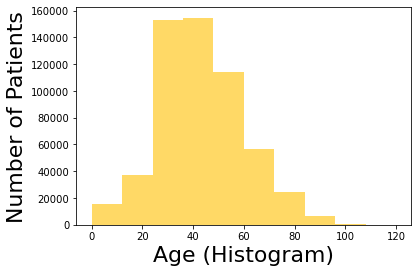

In [6]:
colors = ["#ffd966ff"]

sns.set_palette(sns.color_palette(colors))

plt.hist(x='age', data=covid_clean)
plt.xlabel("Age (Histogram)", fontsize=22)
plt.ylabel("Number of Patients", fontsize=22);
plt.savefig("age_hist.png")

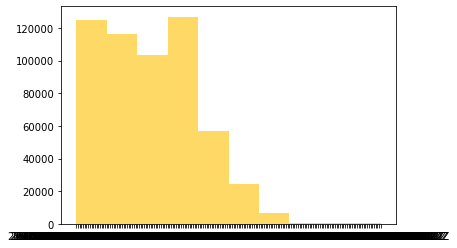

In [7]:
plt.hist(x='entry_date', data=covid_clean);

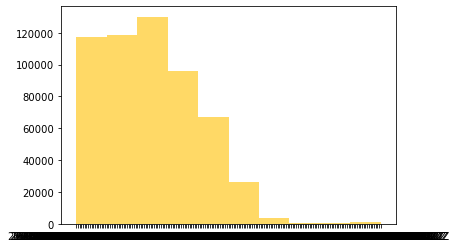

In [8]:
plt.hist(x='date_symptoms', data=covid_clean);

In [69]:
covid_clean.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'passed'],
      dtype='object')

In [9]:
keep = ['age', 'covid_res', 'contact_other_covid', 'inmsupr', 'passed']
comorbs = ['pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco']
outcomes = ['intubed', 'pneumonia','icu', 'passed']
len(keep + comorbs + outcomes)

20

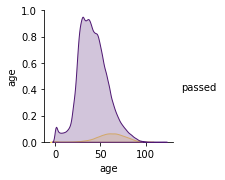

In [10]:
colors = ["#4f1873ff", "#ffd966ff"]
sns.set_palette(sns.color_palette(colors))
g = sns.pairplot(covid_clean[['age', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))
plt.savefig("covid_deaths_by_age.jpg",bbox_inches='tight')

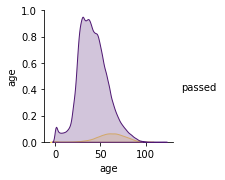

In [11]:
colors = ["#4f1873ff", "#ffd966ff"]
sns.set_palette(sns.color_palette(colors))
g = sns.pairplot(covid_clean[['age', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))
plt.savefig("covid_deaths_by_age.jpg",bbox_inches='tight')

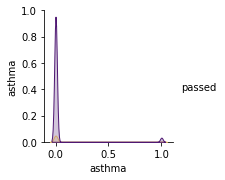

In [12]:
g = sns.pairplot(covid_clean[['asthma', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))
plt.xlabel("Age", fontsize=22)
plt.ylabel("Hue: Survived / Died", fontsize=22);

In [13]:
asthma = covid_clean[(covid_clean['asthma']==1) & (covid_clean['patient_type']==1) & (covid_clean['covid_res']==1)]

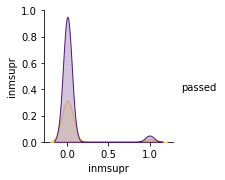

In [14]:
g = sns.pairplot(asthma[['inmsupr', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))

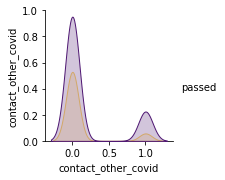

In [15]:
g = sns.pairplot(asthma[['contact_other_covid', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))

In [16]:
# COVID patients inpatient / hospitalized
covid_hosp = covid_clean[covid_clean['patient_type']==1]
covid_hosp.shape

(120026, 24)

In [17]:
# COVID patients outpatient
covid_outpt = covid_clean[covid_clean['patient_type']==0]
covid_outpt.shape

(441070, 24)

In [18]:
# proportion of deaths relative to total dataset
covid_clean.passed.sum()/len(covid_clean)

0.06327437729016068

In [19]:
# proportion of deaths relative to hospitalized subset
covid_hosp.passed.sum()/len(covid_hosp)

0.2661839934680819

In [20]:
# proportion of deaths relative to outpatient subset
covid_outpt.passed.sum()/len(covid_outpt)

0.008057677919604598

### Immunosuppression

In [21]:
covid_immun = covid_clean[covid_clean['inmsupr']==1]
covid_immun.shape

(8870, 24)

In [22]:
# proportion of deaths relative to immunosuppressed subset, both in- and out-patient
covid_immun.passed.sum()/len(covid_immun)

0.15084554678692222

In [23]:
covid_immun_hosp = covid_clean[(covid_clean['inmsupr']==1) &\
                              (covid_clean['patient_type']==1)]
covid_immun_hosp.shape

(4655, 24)

In [24]:
# proportion of immunosuppressed deaths in immunosuppressed hospitalized subset
covid_immun_hosp.passed.sum()/len(covid_immun_hosp)

0.26100966702470463

In [25]:
# proportion of immunosuppressed patients in total dataset
len(covid_immun)/len(covid_clean)

0.01580834652180732

In [26]:
# HIGHER
# proportion of immunosuppressed patients in hospitalized subset
len(covid_immun_hosp)/len(covid_hosp)

0.03878326362621432

/Users/jess/workspace/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


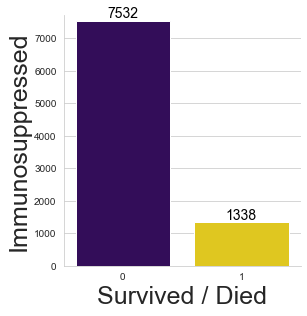

In [27]:
import math

sns.set_style('whitegrid')

colors = ["#330066", "#FFDF00"]
sns.set_palette(sns.color_palette(colors))


def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

sns.catplot('passed', data=covid_immun, kind='count', alpha=1, height=4, aspect=1)

plt.xlabel("Survived / Died", fontsize=25)
plt.ylabel("Immunosuppressed", fontsize=25);

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = covid_immun['passed'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='black', ha='center', va='bottom')
plt.savefig("immun_passed.jpg",bbox_inches='tight')
plt.show()


### Chronic Kidney Disease

In [28]:
# proportion of renal patients in total dataset
(covid_clean['renal_chronic']==1).sum()/len(covid_clean)

0.019841524445014757

In [29]:
# proportion of renal patients in hospitalized subset
(covid_hosp['renal_chronic']==1).sum()/len(covid_hosp)

0.05968706780197624

In [30]:
#HIGHER
# proportion of renal patients in immunosuppressed subset
(covid_immun['renal_chronic']==1).sum()/len(covid_immun)

0.1463359639233371

In [31]:
# slightly higher
(covid_immun_hosp['renal_chronic']==1).sum()/len(covid_immun_hosp)

0.18302900107411385

### COPD

In [32]:
# proportion of COPD patients in total dataset
(covid_clean['copd']==1).sum()/len(covid_clean)

0.01609350271611275

In [33]:
# higher
# proportion of COPD patients in hospitalized subset
(covid_hosp['copd']==1).sum()/len(covid_hosp)

0.045215203372602604

In [34]:
# higher
# proportion of COPD patients in immunosuppressed subset
(covid_immun['copd']==1).sum()/len(covid_immun)

0.07440811724915446

In [35]:
# slightly higher
(covid_immun_hosp['copd']==1).sum()/len(covid_immun_hosp)

0.08464017185821697

### Asthma


In [36]:
# proportion of asthma patients in total dataset
(covid_clean['asthma']==1).sum()/len(covid_clean)

0.031908978142777704

In [37]:
# proportion of asthma patients in hospitalized subset
(covid_hosp['asthma']==1).sum()/len(covid_hosp)

0.025869394964424374

In [38]:
# proportion of asthma patients in immunosuppressed subset
(covid_immun['asthma']==1).sum()/len(covid_immun)

0.06076662908680947

In [39]:
# slightly LOWER
(covid_immun_hosp['asthma']==1).sum()/len(covid_immun_hosp)

0.0406015037593985

### Other Disease Unspecified

In [40]:
# proportion of patients with other unspecified disease in total dataset
(covid_clean['other_disease']==1).sum()/len(covid_clean)

0.030192694298301896

In [41]:
# proportion of patients with other unspecified disease in hospitalized subset
(covid_hosp['other_disease']==1).sum()/len(covid_hosp)

0.059945345175212036

In [42]:
# proportion of patients with other unspecified disease in immunosuppressed subset
(covid_immun['other_disease']==1).sum()/len(covid_immun)

0.21679819616685456

In [43]:
(covid_immun_hosp['other_disease']==1).sum()/len(covid_immun_hosp)

0.24962406015037594

### Engineered Features

In [44]:
covid_feats.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'passed', 'comorb_count', 'imm_comorb',
       'imm_covid_pos', 'imm_other_dis', 'imm_lung_disease'],
      dtype='object')

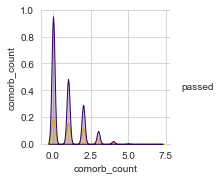

In [45]:
g = sns.pairplot(covid_feats[['comorb_count', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))

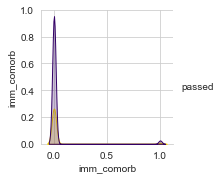

In [46]:
g = sns.pairplot(covid_feats[['imm_comorb', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))

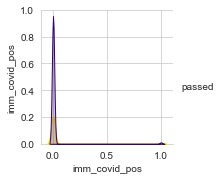

In [47]:
g = sns.pairplot(covid_feats[['imm_covid_pos', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))

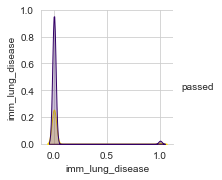

In [48]:
g = sns.pairplot(covid_feats[['imm_lung_disease', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))

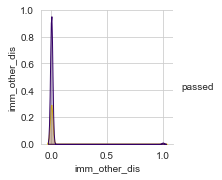

In [49]:
g = sns.pairplot(covid_feats[['imm_other_dis', 'passed']], hue ='passed', plot_kws=dict(alpha=.3, edgecolor='none'))